In [ ]:
import numpy as np
import math

In [ ]:
def inverstK(x,y,z):
  L = [6.5,17.5,17]

  Ag1 = math.atan(y/x)
  Ag3 = math.acos(((x*x)+(y*y)+
            ((z-L[0])**2)-(L[1]**2)-(L[2]**2))/(2*L[1]*L[2]))
  Ag2 = np.radians(90)-(math.asin((L[2]*np.sin(Ag3))/
            (np.sqrt(((x*x)+(y*y))+((z-L[0])**2)))) +
              math.atan((z-L[0])/np.sqrt((x*x)+(y*y))))
  # Ag2 = np.radians(90) - (math.asin((z-(z-L[0]))/(np.sqrt(x*x+y*y))) - math.atan((L[1]*np.sin(Ag3))/(L[0]+L[1]*np.cos(Ag3))))
  # Ag2 = np.radians(90) - np.arcsin(((z-L[0])*(L[1]+L[2]*np.cos(Ag3)) - np.sqrt(x*x+y*y)*(L[2]*np.sin(Ag3)))/(x*x+y*y+(z-L[0]**2)))

  DAg1 = np.degrees(Ag1)
  DAg2 = np.degrees(Ag2)
  DAg3 = np.degrees(Ag3)

  arAg = np.array([DAg1,DAg2,DAg3])

  return arAg

In [ ]:
def calStep(starT, endT):
  step_per_sec = 0.25
  T_step = (endT - starT)/step_per_sec

  return T_step

In [ ]:
def createPath(P1, P2, step):

  step_per_sec = 0.25
  Px = P2[0] - P1[0]
  Py = P2[1] - P1[1]
  Pz = P2[2] - P1[2]

  Val_per_step_Px = Px/step
  Val_per_step_Py = Py/step
  Val_per_step_Pz = Pz/step
  arPath = np.zeros((step+1 , 7))

  for i in range(step+1):
    X = float(P1[0] + Val_per_step_Px * i)
    Y = float(P1[1] + Val_per_step_Py * i)
    Z = float(P1[2] + Val_per_step_Pz * i)

    Ag_data = inverstK(X,Y,Z)

    arPath[i] = np.array([i*step_per_sec+P1[3],X,Y,Z,Ag_data[0],Ag_data[1],Ag_data[2]])

  return arPath

In [ ]:
print(inverstK(20,20,15))

[45.        42.6476335 62.2544219]


In [ ]:

S1 = np.array([34.5,0,6.5,0])
S2 = np.array([24.38,24.38,6.5,10])
S3 = np.array([20,20,15,20])
S4 = np.array([34.5,0,6.5,35])

step_S1_2 = int(calStep(S1[3],S2[3]))
step_S2_3 = int(calStep(S2[3],S3[3]))
step_S3_4 = int(calStep(S3[3],S4[3]))

In [ ]:
print(step_S1_2)
print(step_S2_3)
print(step_S3_4)

40
40
60


In [ ]:
Path1_2 = createPath(S1,S2,step_S1_2)
Path2_3 = createPath(S2,S3,step_S2_3)
Path3_4 = createPath(S3,S4,step_S3_4)

Path1_4 = np.concatenate((Path1_2, Path2_3, Path3_4), axis=0)

In [ ]:
print(Path1_4)

[[ 0.         34.5         0.         ...  0.         90.
   0.        ]
 [ 0.25       34.247       0.6095     ...  1.01959562 83.2311024
  13.7378537 ]
 [ 0.5        33.994       1.219      ...  2.05370481 80.52950028
  19.22222457]
 ...
 [34.5        34.01666667  0.66666667 ...  1.12275249 80.13633505
  19.05175783]
 [34.75       34.25833333  0.33333333 ...  0.55746992 83.10211746
  13.51876376]
 [35.         34.5         0.         ...  0.         90.
   0.        ]]


In [ ]:
print(Path1_4[1])

[ 0.25       34.247       0.6095      6.5         1.01959562 83.2311024
 13.7378537 ]


In [ ]:
import pandas as pd
Path1_4 = pd.DataFrame(Path1_4)
Path1_4.loc[:40]

,0,1,2,3,4,5,6
0,0.00,34.500,0.0000,6.5,0.000000,90.000000,0.000000
1,0.25,34.247,0.6095,6.5,1.019596,83.231102,13.737854
2,0.50,33.994,1.2190,6.5,2.053705,80.529500,19.222225
3,0.75,33.741,1.8285,6.5,3.101952,78.529948,23.282247
4,1.00,33.488,2.4380,6.5,4.163913,76.908814,26.574565
5,1.25,33.235,3.0475,6.5,5.239114,75.540093,29.354800
6,1.50,32.982,3.6570,6.5,6.327035,74.359020,31.754319
7,1.75,32.729,4.2665,6.5,7.427105,73.327149,33.851082
8,2.00,32.476,4.8760,6.5,8.538702,72.419533,35.695667
9,2.25,32.223,5.4855,6.5,9.661162,71.618981,37.322921


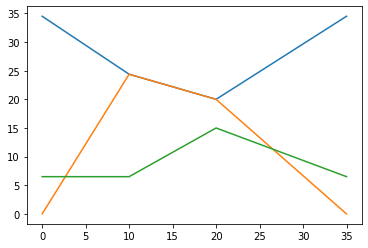

In [ ]:
import matplotlib.pyplot as plt
plt.plot(Path1_4[0],Path1_4[1])
plt.plot(Path1_4[0],Path1_4[2])
plt.plot(Path1_4[0],Path1_4[3])
plt.show()

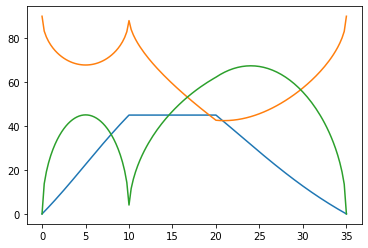

In [ ]:
plt.plot(Path1_4[0],Path1_4[4])
plt.plot(Path1_4[0],Path1_4[5])
plt.plot(Path1_4[0],Path1_4[6])
plt.show()

In [ ]:
def farword(num_case,dhP):
  trans_Matrix = np.zeros((num_case,4,4))
  result = np.identity((4))
  for i in range(num_case) :
        trans_Matrix[i][0][0] = np.cos(dhP[i][3]*3.1416/180);
        trans_Matrix[i][0][1] = -1 * np.sin(dhP[i][3]*3.1416/180);
        trans_Matrix[i][0][2] = 0;
        trans_Matrix[i][0][3] = dhP[i][1];

        trans_Matrix[i][1][0] = np.sin(dhP[i][3]*3.1416/180) * np.cos(dhP[i][0]*3.1416/180);
        trans_Matrix[i][1][1] = np.cos(dhP[i][3]*3.1416/180) * np.cos(dhP[i][0]*3.1416/180);
        trans_Matrix[i][1][2] = -1 * np.sin(dhP[i][0]*3.1416/180);
        trans_Matrix[i][1][3] = -1 * np.sin(dhP[i][0]*3.1416/180) * dhP[i][2];

        trans_Matrix[i][2][0] = np.sin(dhP[i][3]*3.1416/180) * np.sin(dhP[i][0]*3.1416/180);
        trans_Matrix[i][2][1] = np.cos(dhP[i][3]*3.1416/180) * np.sin(dhP[i][0]*3.1416/180);
        trans_Matrix[i][2][2] = np.cos(dhP[i][0]*3.1416/180);
        trans_Matrix[i][2][3] = np.cos(dhP[i][0]*3.1416/180) * dhP[i][2];

        trans_Matrix[i][3][0] = 0;
        trans_Matrix[i][3][1] = 0;
        trans_Matrix[i][3][2] = 0;
        trans_Matrix[i][3][3] = 1;

        # trans_Matrix[i][0][0] = np.cos(dhP[i][3]*3.1416/180);
        # trans_Matrix[i][0][1] = -1 * np.sin(dhP[i][3]*3.1416/180)* np.cos(dhP[i][0]*3.1416/180);
        # trans_Matrix[i][0][2] = np.sin(dhP[i][3]*3.1416/180)* np.sin(dhP[i][0]*3.1416/180);
        # trans_Matrix[i][0][3] = dhP[i][1]*np.cos(dhP[i][3]*3.1416/180);

        # trans_Matrix[i][1][0] = np.sin(dhP[i][3]*3.1416/180);
        # trans_Matrix[i][1][1] = np.cos(dhP[i][3]*3.1416/180) * np.cos(dhP[i][0]*3.1416/180);
        # trans_Matrix[i][1][2] = -1 *np.cos(dhP[i][3]*3.1416/180) * np.sin(dhP[i][0]*3.1416/180);
        # trans_Matrix[i][1][3] = dhP[i][1]*np.sin(dhP[i][3]*3.1416/180);

        # trans_Matrix[i][2][0] = 0;
        # trans_Matrix[i][2][1] = np.sin(dhP[i][3]*3.1416/180);
        # trans_Matrix[i][2][2] = np.cos(dhP[i][3]*3.1416/180);
        # trans_Matrix[i][2][3] = dhP[i][2];

        # trans_Matrix[i][3][0] = 0;
        # trans_Matrix[i][3][1] = 0;
        # trans_Matrix[i][3][2] = 0;
        # trans_Matrix[i][3][3] = 1;

  for j in range(num_case):
    result = np.matmul(result,trans_Matrix[j])

  return result
   

In [ ]:
Path1_4.shape

(143, 7)

In [ ]:
Path1_4[6][40]

4.043673994526874

In [ ]:
L = np.array([6.5,17.5,17])

dh = np.array([[0,0,L[0],Path1_4[4][0]],
               [-90,0,0,90-(Path1_4[5][0])],
               [0,L[1],0,Path1_4[6][0]],
               [0,L[2],0,0]])

out = farword(4,dh)

In [ ]:
dh

array([[  0. ,   0. ,   6.5,   0. ],
       [-90. ,   0. ,   0. ,   0. ],
       [  0. ,  17.5,   0. ,   0. ],
       [  0. ,  17. ,   0. ,   0. ]])

In [ ]:
out 

array([[ 1.0000000e+00,  0.0000000e+00,  0.0000000e+00,  3.4500000e+01],
       [ 0.0000000e+00, -3.6732051e-06,  1.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00, -1.0000000e+00, -3.6732051e-06,  6.5000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  1.0000000e+00]])

In [ ]:
case = 4
outP = np.zeros((Path1_4.shape[0],case,4))
for i in range(Path1_4.shape[0]):
  dhP = np.array([[0,0,L[0],Path1_4[4][i]],
               [-90,0,0,(Path1_4[5][i])-90],
               [0,L[1],0,Path1_4[6][i]],
               [0,L[2],0,0]])
  outP[i] = farword(case ,dhP)

In [ ]:
outT = outP.reshape((Path1_4.shape[0],case*4))

In [ ]:
outT = pd.DataFrame(outT)

In [ ]:
Path1_4.loc[40:81]

,0,1,2,3,4,5,6
40,10.00,24.3800,24.3800,6.5000,45.0,88.007477,4.043674
41,10.00,24.3800,24.3800,6.5000,45.0,88.007477,4.043674
42,10.25,24.2705,24.2705,6.7125,45.0,83.944329,11.570164
43,10.50,24.1610,24.1610,6.9250,45.0,81.488461,15.828706
44,10.75,24.0515,24.0515,7.1375,45.0,79.495861,19.140832
45,11.00,23.9420,23.9420,7.3500,45.0,77.753377,21.939040
46,11.25,23.8325,23.8325,7.5625,45.0,76.173724,24.400410
47,11.50,23.7230,23.7230,7.7750,45.0,74.710924,26.618207
48,11.75,23.6135,23.6135,7.9875,45.0,73.337215,28.648734
49,12.00,23.5040,23.5040,8.2000,45.0,72.034305,30.529077


In [ ]:
outT[[3,7,11]].loc[40:81]

,3,7,11
40,24.379955,24.380045,6.500000
41,24.379955,24.380045,6.500000
42,24.270454,24.270545,6.712500
43,24.160953,24.161044,6.925001
44,24.051453,24.051544,7.137501
45,23.941952,23.942044,7.350002
46,23.832451,23.832544,7.562502
47,23.722950,23.723044,7.775003
48,23.613449,23.613544,7.987503
49,23.503948,23.504043,8.200004


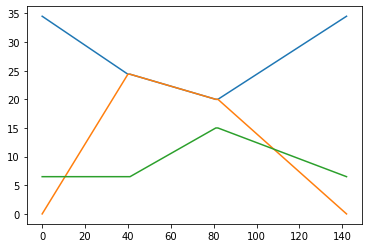

In [ ]:
plt.plot(outT[3])
plt.plot(outT[7])
plt.plot(outT[11])
plt.show()

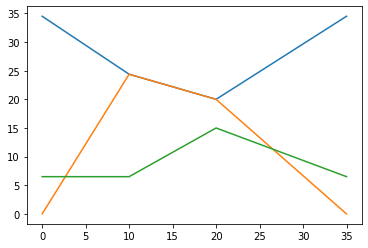

In [ ]:
plt.plot(Path1_4[0],Path1_4[1])
plt.plot(Path1_4[0],Path1_4[2])
plt.plot(Path1_4[0],Path1_4[3])
plt.show()

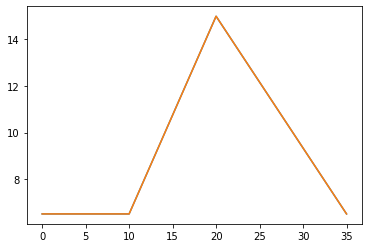

In [ ]:
plt.plot(Path1_4[0],Path1_4[3])
plt.plot(Path1_4[0],outT[11])
plt.show()

In [ ]:
def findC( Cstart, Cend , t , vStart , vEnd):
  c = np.zeros((4))
  c[0] = Cstart
  c[1] = vStart
  # c[2] = (3/(t**2))*(Cend - Cstart) - (2/t)*vStart - (1/t)*vEnd
  # c[3] = (-2/(t**3))*(Cend - Cstart) + (1/(t**2))*(vEnd - vStart)
  c[2] = (-3*(Cstart - Cend)-(2*vStart + vEnd)*t)/(t**2)
  c[3] = (2*(Cstart - Cend)+(vStart + vEnd)*t)/(t**3)

  return c

In [ ]:
def getEq( C ):

  var = np.poly1d([C[3],C[2],C[1],C[0]])

  df0 = var
  df1 = df0 .deriv()
  df2 = df1.deriv()

  return df0,df1,df2

In [ ]:
def createPathCubic(P1, P2, step, t, vStart , vEnd):

  step_per_sec = 0.25

  arPathCubic = np.zeros((step+1 , 10))
  outP = np.zeros((arPathCubic.shape[0],case,4))

  inP1 = inverstK(P1[0],P1[1],P1[2])
  inP2 = inverstK(P2[0],P2[1],P2[2])

  Cag1 = findC(inP1[0],inP2[0],t,vStart,vEnd)
  Cag2 = findC(inP1[1],inP2[1],t,vStart,vEnd)
  Cag3 = findC(inP1[2],inP2[2],t,vStart,vEnd)

  E01,E11,E21 = getEq( Cag1 ) 
  E02,E12,E22 = getEq( Cag2 ) 
  E03,E13,E23 = getEq( Cag3 ) 

  c1 = []
  Vc1 = []
  Ac1 = []

  c2 = []
  Vc2 = []
  Ac2 = []

  c3 = []
  Vc3 = []
  Ac3 = []

  for i in range(step + 1):

    c1.append(E01(i*0.25))
    Vc1.append(E11(i*0.25))
    Ac1.append(E21(i*0.25))
    
    c2.append(E02(i*0.25))
    Vc2.append(E12(i*0.25))
    Ac2.append(E22(i*0.25))

    c3.append(E03(i*0.25))
    Vc3.append(E13(i*0.25))
    Ac3.append(E23(i*0.25))

    arPathCubic[i] = np.array([i*step_per_sec + P1[3],
                          c1[i],c2[i],c3[i],
                          Vc1[i],Vc2[i],Vc3[i],
                          Ac1[i],Ac2[i],Ac3[i]])
    
  return arPathCubic


In [ ]:
Path_Cubic_1_2 = createPathCubic(S1,S2,step_S1_2,S2[3]-S1[3],0,0.5)
Path_Cubic_2_3 = createPathCubic(S2,S3,step_S2_3,S3[3]-S2[3],0.5,0.5)
Path_Cubic_3_4 = createPathCubic(S3,S4,step_S3_4,S4[3]-S3[3],0.5,0)

In [ ]:
Path_Cubic_1_4 = np.concatenate((Path_Cubic_1_2, Path_Cubic_2_3, Path_Cubic_3_4), axis=0)

In [ ]:
Path_Cubic_1_4.shape

(143, 10)

In [ ]:
Path_Cubic_1_4_wiout_XYZ = pd.DataFrame(Path_Cubic_1_4)

In [ ]:
Path_Cubic_1_4_wiout_XYZ.loc[0:41]

,0,1,2,3,4,5,6,7,8,9
0,0.00,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,2.6000,-0.219551,0.142620
1,0.25,0.079922,89.993279,0.004409,0.634062,-0.053203,0.035076,2.4725,-0.206074,0.137989
2,0.50,0.314375,89.973679,0.017442,1.236250,-0.103037,0.068995,2.3450,-0.192596,0.133358
3,0.75,0.695391,89.942042,0.038810,1.806563,-0.149501,0.101755,2.2175,-0.179119,0.128727
4,1.00,1.215000,89.899209,0.068223,2.345000,-0.192596,0.133358,2.0900,-0.165641,0.124096
5,1.25,1.865234,89.846024,0.105392,2.851562,-0.232322,0.163804,1.9625,-0.152164,0.119465
6,1.50,2.638125,89.783329,0.150028,3.326250,-0.268678,0.193091,1.8350,-0.138686,0.114834
7,1.75,3.525703,89.711966,0.201841,3.769062,-0.301665,0.221221,1.7075,-0.125208,0.110203
8,2.00,4.520000,89.632778,0.260542,4.180000,-0.331282,0.248193,1.5800,-0.111731,0.105572
9,2.25,5.613047,89.546606,0.325841,4.559063,-0.357530,0.274007,1.4525,-0.098253,0.100941


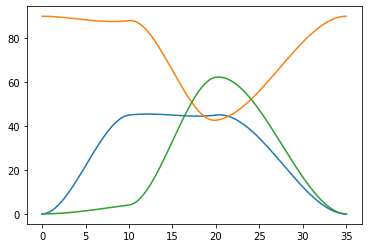

In [ ]:
plt.plot(Path_Cubic_1_4_wiout_XYZ[0],Path_Cubic_1_4_wiout_XYZ[1])
plt.plot(Path_Cubic_1_4_wiout_XYZ[0],Path_Cubic_1_4_wiout_XYZ[2])
plt.plot(Path_Cubic_1_4_wiout_XYZ[0],Path_Cubic_1_4_wiout_XYZ[3])
plt.show()

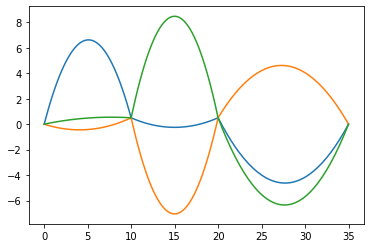

In [ ]:
plt.plot(Path_Cubic_1_4_wiout_XYZ[0],Path_Cubic_1_4_wiout_XYZ[4])
plt.plot(Path_Cubic_1_4_wiout_XYZ[0],Path_Cubic_1_4_wiout_XYZ[5])
plt.plot(Path_Cubic_1_4_wiout_XYZ[0],Path_Cubic_1_4_wiout_XYZ[6])
plt.show()

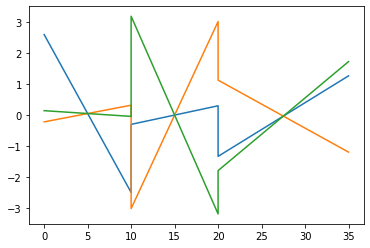

In [ ]:
plt.plot(Path_Cubic_1_4_wiout_XYZ[0],Path_Cubic_1_4_wiout_XYZ[7])
plt.plot(Path_Cubic_1_4_wiout_XYZ[0],Path_Cubic_1_4_wiout_XYZ[8])
plt.plot(Path_Cubic_1_4_wiout_XYZ[0],Path_Cubic_1_4_wiout_XYZ[9])
plt.show()

In [ ]:
Path_Cubic_1_4_wiout_XYZ[3]

0      0.000000e+00
1      4.408649e-03
2      1.744164e-02
3      3.880952e-02
4      6.822287e-02
           ...     
138    8.242786e-01
139    4.691571e-01
140    2.109589e-01
141    5.335087e-02
142   -3.552714e-14
Name: 3, Length: 143, dtype: float64

In [ ]:
L = np.array([6.5,17.5,17])
case = 4
outP = np.zeros((Path_Cubic_1_4_wiout_XYZ.shape[0],case,4))
for i in range(Path_Cubic_1_4_wiout_XYZ.shape[0]):
  dhP = np.array([[0,0,L[0],Path_Cubic_1_4_wiout_XYZ[1][i]],
               [-90,0,0,(Path_Cubic_1_4_wiout_XYZ[2][i])-90],
               [0,L[1],0,Path_Cubic_1_4_wiout_XYZ[3][i]],
               [0,L[2],0,0]])
  outP[i] = farword(case ,dhP)

In [ ]:
outT = outP.reshape((Path1_4.shape[0],case*4))
outT = pd.DataFrame(outT)

In [ ]:
outT[[3,7,11]].loc[0:43]

,3,7,11
0,34.500000,0.000000,6.500000
1,34.499966,0.048124,6.502739
2,34.499479,0.189297,6.510674
3,34.497449,0.418712,6.523384
4,34.492213,0.731545,6.540448
5,34.481651,1.122932,6.561444
6,34.463299,1.587953,6.585952
7,34.434462,2.121613,6.613549
8,34.392313,2.718821,6.643814
9,34.333990,3.374379,6.676326


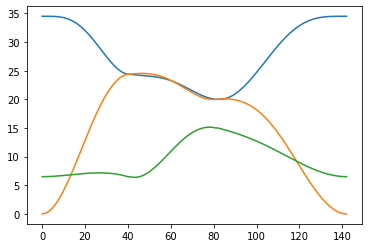

In [ ]:
plt.plot(outT[3])
plt.plot(outT[7])
plt.plot(outT[11])
plt.show()